In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784)
    x_train = x_train / 255.0
    x_test = x_test.reshape(-1, 784)
    x_test = x_test / 255.0
    return x_train, y_train, x_test, y_test

In [5]:
def one_hot(labels):
    num_classes = np.max(labels) + 1
    encoded_labels = np.eye(num_classes)[labels]
    return encoded_labels

In [41]:
class NeuralNetwork:

    def __init__(self):
        self.hidden_units = 256
        self.num_classes = 10
        self.learning_rate = 0.01
        self.steps = 100

        self.W1 = np.random.randn(784, self.hidden_units) * 0.01
        self.b1 = np.random.randn(self.hidden_units)
        self.W2 = np.random.randn(self.hidden_units, self.num_classes) * 0.01
        self.b2 = np.random.randn(self.num_classes)

        self.loss_history = np.zeros(self.steps)

    def softmax(self, z):
        exp = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def d_relu(self, z):
        return np.array(z > 0, dtype = np.float32)

    def forward(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.relu(z1)

        z2 = np.dot(a1, self.W2) + self.b2
        prob = self.softmax(z2)

        return prob, a1

    def loss(self, X, y):
        prob, a1 = self.forward(X)
        m = y.shape[0]
        loss = -np.sum(y * np.log(prob + 1e-8)) / m
        return loss

    def train(self, X, y):
        m = X.shape[0]
        
        for i in range(self.steps):
            prob, a1 = self.forward(X)

            dZ2 = prob - y
            dW2 = np.dot(a1.T, dZ2) / m
            db2 = np.mean(dZ2, axis=0)
            dZ1 = np.dot(dZ2, self.W2.T) * self.d_relu(a1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.mean(dZ1, axis=0)

            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1

            loss = self.loss(X, y)
            self.loss_history[i] = loss
    
    def predict(self, X):
        probabilities, a1  = self.forward(X)
        predictions = np.argmax(probabilities, axis=1)
        return predictions

    def accuracy(self, X, y):
        prob, a1 = self.forward(X)
        pred = np.argmax(prob, 1)
        print(pred)
        y1 = np.argmax(y, 1)
        print(y1)
        accuracy = np.mean(pred == y1)
        return accuracy

In [7]:
model = NeuralNetwork()

x_train, y_train, x_test, y_test = load_mnist()
y1 = y_train
y_train = one_hot(y_train)
y2 = y_test
y_test = one_hot(y_test)

model.train(x_train, y_train)

In [44]:
model.train(x_train, y_train)

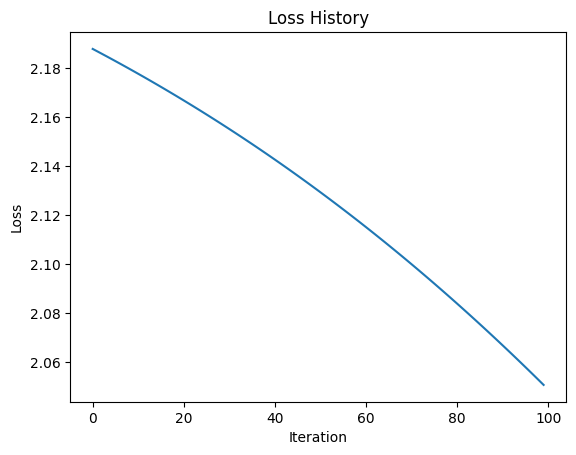

In [46]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

In [47]:
model.accuracy(x_train, y_train)

[22752 33861 13495 20597 23033 21759 30904  4647 22958 36319]
[ 1  3  5  7  2  0 13 15 17  4]


0.0

In [14]:
prob, a1 = model.forward(x_train)
print(prob)
y1 = np.argmax(y_train, 1)
print(y1)
print(y_train)
print(np.argmax(prob, 1))
print(np.argmax(prob[50]))
print(prob[10])

[[0.10328145 0.11096847 0.09688692 ... 0.10366766 0.0976259  0.09743456]
 [0.11354598 0.10611905 0.09334221 ... 0.10413601 0.09634755 0.09870012]
 [0.09859375 0.1103863  0.09789031 ... 0.10684756 0.09569688 0.10108507]
 ...
 [0.10219936 0.11057549 0.09446892 ... 0.10534521 0.09667848 0.1010954 ]
 [0.10489214 0.10952305 0.09700945 ... 0.10470109 0.09545524 0.09904348]
 [0.09973815 0.11185721 0.09847691 ... 0.10473097 0.09720282 0.10031531]]
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[1 0 1 ... 1 1 1]
1
[0.09573642 0.11577889 0.098633   0.1060152  0.09551785 0.09014508
 0.09797464 0.10406992 0.09914483 0.09698418]


In [22]:
def accuracy(prob, labels):
    return np.mean(prob == labels)

In [45]:
accuracy(prob, y1)

0.0

In [33]:
prob, a1 = model.forward(x_test)
y1 = np.argmax(y_test, 1)
print(y1)
pred = np.argmax(prob, 1)
accuracy(pred, y1)
pred

[7 2 1 ... 4 5 6]


(10000,)

In [48]:
j = 0
for i in range(len(y1)):
    if y1[i] == np.argmax(prob[i]):
        print(prob[i])
        j += 1

j / 10000

[0.0993308  0.10976323 0.09650196 0.10095844 0.09873269 0.08998236
 0.09614762 0.11166254 0.0946948  0.10222555]
[0.09417312 0.12041286 0.09876488 0.10221936 0.09687784 0.08977888
 0.09813215 0.10483912 0.09670945 0.09809233]
[0.11189408 0.10244797 0.09555615 0.10005993 0.09522635 0.09517725
 0.09902326 0.10465207 0.09664291 0.09932003]
[0.09298631 0.12152947 0.09867129 0.10316447 0.09677578 0.08886334
 0.09747568 0.10511835 0.09685442 0.0985609 ]
[0.10849115 0.10624833 0.09762037 0.10224315 0.09709964 0.09410237
 0.0978885  0.10204686 0.09843185 0.09582779]
[0.11123263 0.10380402 0.09496283 0.10010375 0.09636104 0.0958937
 0.09747994 0.10305422 0.09788434 0.09922353]
[0.09204904 0.12193354 0.0995547  0.10434266 0.09589425 0.08833483
 0.09793592 0.10482394 0.09788864 0.09724249]
[0.1012169  0.10823426 0.09641186 0.10053906 0.0978522  0.09160626
 0.09703126 0.11100623 0.0945994  0.10150257]
[0.11804632 0.09896102 0.0960166  0.09725002 0.09605912 0.09670284
 0.10096546 0.10296664 0.09506

0.2445